In [ ]:
from anarci.germlines import all_germlines
import pandas as pd
from anarci import anarci
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
   

In [ ]:
# input germline ID，output germline sequence
all_species = list(all_germlines['V']['H'].keys())
seq = all_germlines['V']['H']['human']['IGHV5-51*01']
print(all_species)
print(seq)


In [3]:
# input sequence list or tuple，output list of germline ID
def seq2germ(sequences):
    results = anarci(sequences, scheme="imgt", output=False,assign_germline=True,allowed_species=['human'])
    # print(results)
    numbering, alignment_details, hit_tables = results
    # print(numbering)

    print(alignment_details)
    # print(hit_tables)
    vgenes,jgenes=[],[]
    for i in range(len(sequences)):
        (species, vgene), vid =alignment_details[i][0]['germlines'].get('v_gene', [['','unknown'],0])  
        (species, jgene), vid =alignment_details[i][0]['germlines'].get('j_gene', [['','unknown'],0])  

        vgenes.append(vgene)
        jgenes.append(jgene)
    # print(vgene)

    return vgenes,jgenes 

sequence= [("12e8:H","EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLEWIGWIDPEIGDTEYVPKFQGKATMTADTSSNTAYLQLSSLTSEDTAVYYCNAGHDYDRGRFPYWGQGTLVTVSAAKTTPPSVYPLAP"),
           ("12e8:L","DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKLMIYSASNRYTGVPDRFTGSGSGTDFTLTISNMQSEDLADYFCQQYSSYPLTFGAGTKLELKRADAAPTVSIFPPSSEQLTSGGASV")]
seq2germ(sequence)

[[{'id': 'human_H', 'description': '', 'evalue': 5.6e-51, 'bitscore': 163.1, 'bias': 0.3, 'query_start': 0, 'query_end': 119, 'species': 'human', 'chain_type': 'H', 'scheme': 'imgt', 'query_name': '12e8:H', 'germlines': {'v_gene': [('human', 'IGHV1-69-2*01'), 0.6530612244897959], 'j_gene': [('human', 'IGHJ4*01'), 0.8571428571428571]}}], [{'id': 'human_K', 'description': '', 'evalue': 2.5e-50, 'bitscore': 160.8, 'bias': 1.8, 'query_start': 0, 'query_end': 107, 'species': 'human', 'chain_type': 'K', 'scheme': 'imgt', 'query_name': '12e8:L', 'germlines': {'v_gene': [('human', 'IGKV1-33*01'), 0.6630434782608695], 'j_gene': [('human', 'IGKJ4*01'), 0.75]}}]]


(['IGHV1-69-2*01', 'IGKV1-33*01'], ['IGHJ4*01', 'IGKJ4*01'])

In [4]:
# notatee germline ID and Tm to each sequence ；
df=pd.read_excel('pnas.1616408114.sd02.xlsx')
df_tm=pd.read_excel('pnas.1616408114.sd03.xlsx')

Hseqs=tuple(zip(df['Name'],df['VH']))
Lseqs=tuple(zip(df['Name'],df['VL']))

(H_vgenes,H_jgenes)=seq2germ(Hseqs)
(L_vgenes,L_jgenes)=seq2germ(Lseqs)

df['HV-gene']=H_vgenes
df['HJ-gene']=H_jgenes
df['LV-gene']=L_vgenes
df['LJ-gene']=L_jgenes
df['Fab Tm by DSF (°C)']=df_tm['Fab Tm by DSF (°C)']

df.to_csv('seq-gen-tm.csv')

[[{'id': 'human_H', 'description': '', 'evalue': 1.7e-55, 'bitscore': 177.7, 'bias': 2.4, 'query_start': 0, 'query_end': 118, 'species': 'human', 'chain_type': 'H', 'scheme': 'imgt', 'query_name': 'abituzumab', 'germlines': {'v_gene': [('human', 'IGHV1-46*01'), 0.7653061224489796], 'j_gene': [('human', 'IGHJ6*01'), 0.9285714285714286]}}], [{'id': 'human_H', 'description': '', 'evalue': 1.4e-56, 'bitscore': 181.2, 'bias': 2.4, 'query_start': 0, 'query_end': 118, 'species': 'human', 'chain_type': 'H', 'scheme': 'imgt', 'query_name': 'abrilumab', 'germlines': {'v_gene': [('human', 'IGHV1-24*01'), 0.9489795918367347], 'j_gene': [('human', 'IGHJ5*02'), 1.0]}}], [{'id': 'human_H', 'description': '', 'evalue': 2e-60, 'bitscore': 193.7, 'bias': 0.7, 'query_start': 0, 'query_end': 121, 'species': 'human', 'chain_type': 'H', 'scheme': 'imgt', 'query_name': 'adalimumab', 'germlines': {'v_gene': [('human', 'IGHV3-9*01'), 0.9292929292929293], 'j_gene': [('human', 'IGHJ4*01'), 0.9285714285714286]}}]

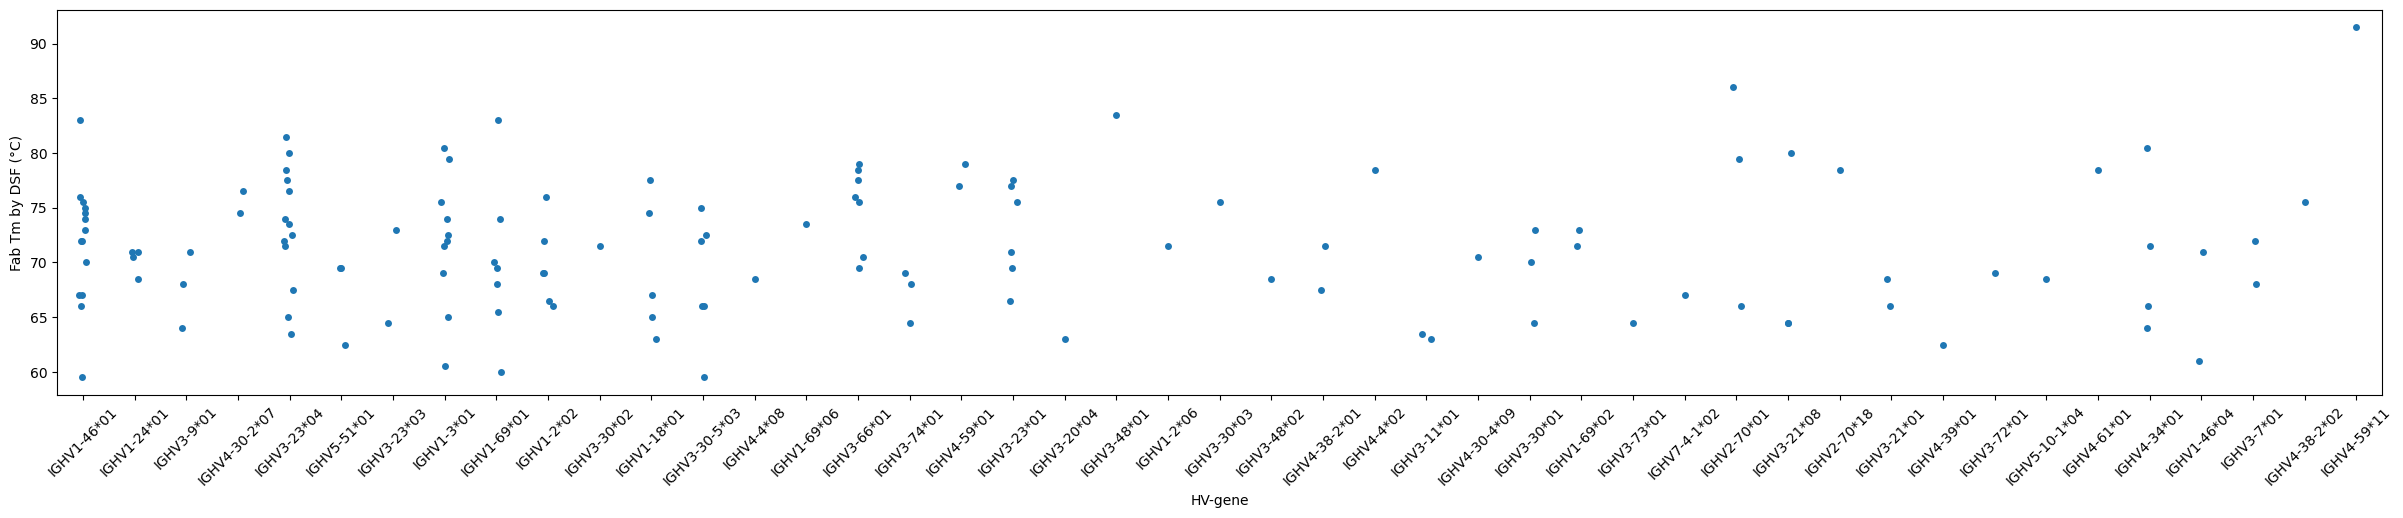

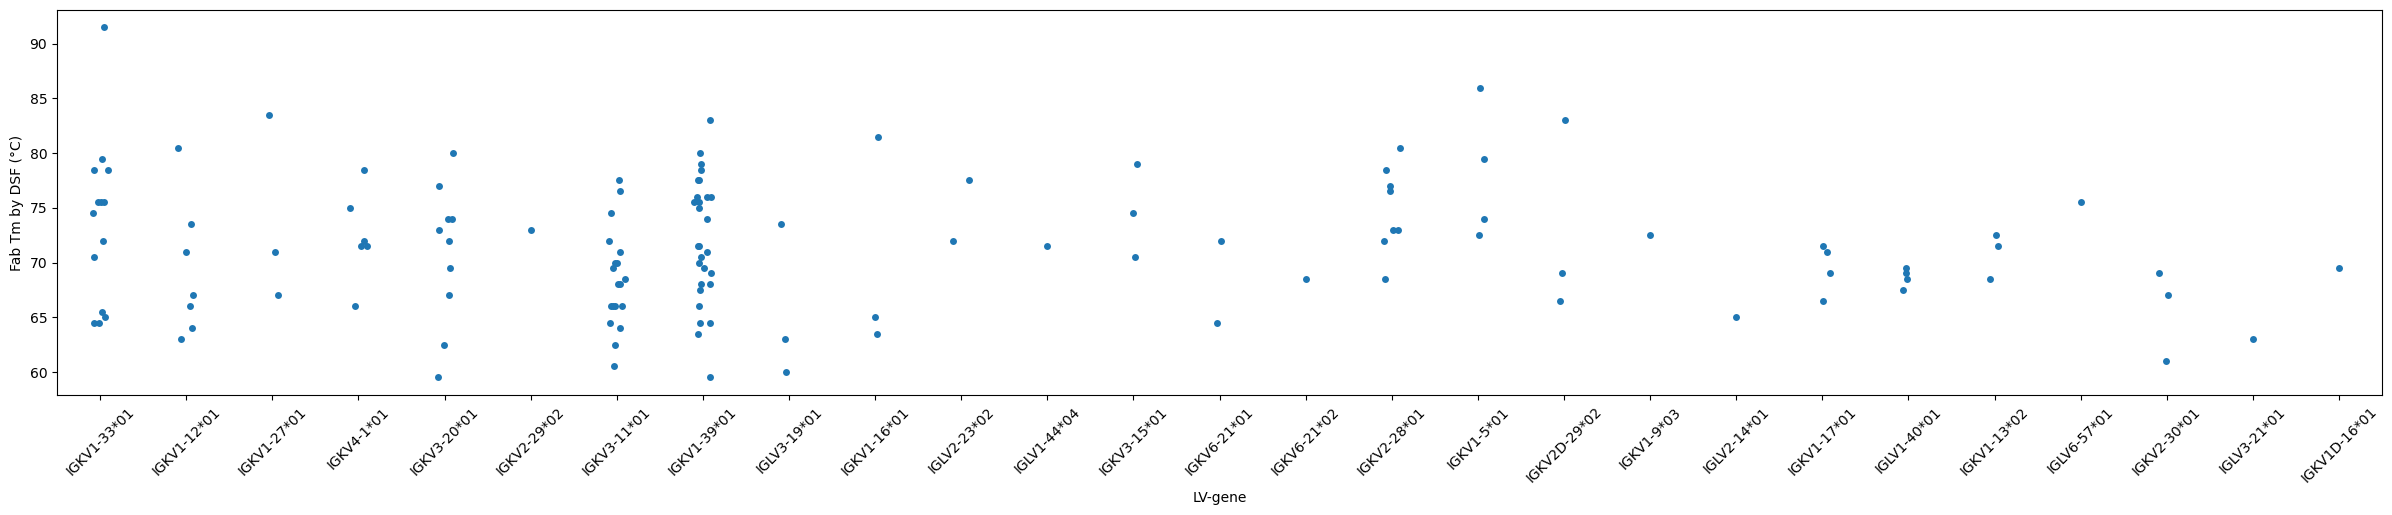

In [ ]:
# plot
df=pd.read_csv('seq-gen-tm.csv')
fig, axes = plt.subplots(4, 1,figsize=(36, 24), dpi=250)
axes[0].tick_params(axis='x', labelrotation=45)
sns.stripplot(x='HV-gene',y='Fab Tm by DSF (°C)',data=df,ax=axes[0])
sns.stripplot(x='LV-gene',y='Fab Tm by DSF (°C)',data=df,ax=axes[1])
sns.stripplot(x='HJ-gene',y='Fab Tm by DSF (°C)',data=df,ax=axes[2])
sns.stripplot(x='LJ-gene',y='Fab Tm by DSF (°C)',data=df,ax=axes[3])

fig.tight_layout()
fig.savefig('Tm over genes.png')

<Axes: ylabel='Fab Tm by DSF (°C)'>

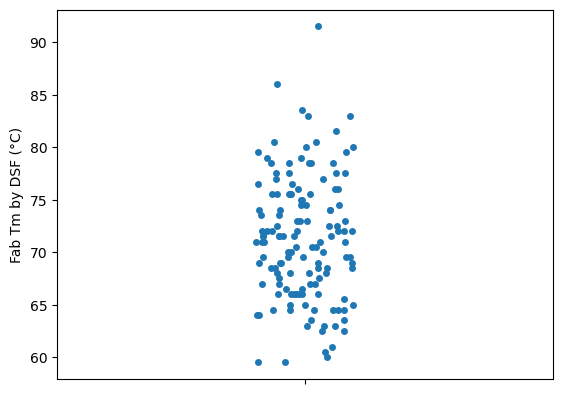

In [24]:
sns.stripplot(y='Fab Tm by DSF (°C)',data=df)